# Data analysis in cerebellar granular layer simulations
## No plasticity mechanism enabled - 4mf per GrC
First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../..')
os.getcwd()
import sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/BurstCoding/SimulationConfigNoPlastBurst4.cfg'
data_path = './results'
simulation_name = 'NoPlasticity-Burst'
simulation_time = 100.0
analysis_time = simulation_time
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Initialize the simulation. If run_the_simulation is true it will run the long simulation and record the activity, network, weights, state variables and stimulation patterns to some files. Otherwise the simulation will be loaded from the files.

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Info'
simulation.config_options['simulation']['seed'] = 123456
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = run_the_simulation
simulation.config_options['simulation']['state_recording_step'] = 100
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'
simulation.config_options['stimulation']['load_pattern_file'] = None
simulation.config_options['mflayer']['register_activity'] = True
simulation.config_options['grclayer']['register_activity'] = True
simulation.config_options['goclayer']['register_activity'] = True
simulation.config_options['grclayer']['save_state_vars'] = None
simulation.config_options['grclayer']['load_state_vars'] = None
simulation.config_options['grclayer']['record_vars'] = None
simulation.config_options['goclayer']['save_state_vars'] = None
simulation.config_options['goclayer']['load_state_vars'] = None
simulation.config_options['goclayer']['record_vars'] = None
simulation.config_options['mfgrcsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['grcgocsynapsis']['weight_recording'] = True
simulation.config_options['gocgrcsynapsis']['weight_recording'] = True
simulation.config_options['gocgocsynapsis']['weight_recording'] = True

Set neuron and synapsis parameters

In [4]:
simulation.config_options['grclayer']['eth'] = -0.050
simulation.config_options['goclayer']['eth'] = -0.064
simulation.config_options['mfgrcsynapsis']['initial_weight'] = 1.5e-9
simulation.config_options['mfgocsynapsis']['initial_weight'] = 0.0e-9
simulation.config_options['grcgocsynapsis']['initial_weight'] = 0.0e-10
simulation.config_options['gocgrcsynapsis']['initial_weight'] = -0.0e-9
simulation.config_options['gocgocsynapsis']['initial_weight'] = -0.0e-9
simulation.initialize()

2017-04-20 13:57:51,232 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2017-04-20 13:57:51,254 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified cell model parameter: tau_istdp in layer mflayer. Using default value
2017-04-20 13:57:51,255 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified number of neurons in layer mflayer
2017-04-20 13:57:51,260 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified cell model parameter: tau_istdp in layer grclayer. Using default value
2017-04-20 13:57:51,262 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified number of neurons in layer grclayer
2017-04-20 13:57:51,265 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified cell model parameter: tau_istdp in layer goclayer. Using default value
2017-04-20 13:57:51,266 - P50526 - MemTotal:79M - Simulation - WARNING: Non-specified number of neurons in layer goclayer


Run the simulation

In [5]:
#simulation.visualize_animation()
simulation.run_simulation()

2017-04-20 13:57:52,784 - P50526 - MemTotal:251M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s


## MF Activity Analysis

Calculate the number of spikes fired in each oscillatory cycle

[  1.25000000e-05   4.64250000e-01   4.48612500e-01   8.71250000e-02
   0.00000000e+00]


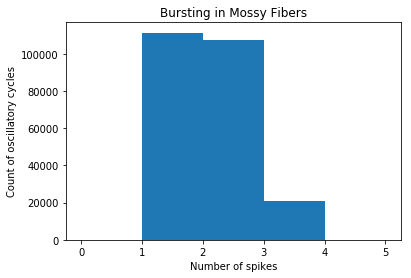

In [6]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'mflayer',
                                                          init_time = simulation_time-analysis_time, 
                                                          end_time = simulation_time)
oscillation_frequency = 8.0
import numpy
number_of_bins = int(analysis_time*oscillation_frequency)
bin_id = numpy.floor(gtime*oscillation_frequency).astype(int)
n_mf_neurons = simulation.cerebellum.get_number_of_elements(layer='mflayer')
neuron_list = range(n_mf_neurons)
#neuron_list = [0]
bin_count = numpy.zeros([len(neuron_list),number_of_bins],dtype=int)
for idx, neuron_id in enumerate(neuron_list):
    neuron_spike_index = (gcell_id==neuron_id)
    bin_count[idx,:] = numpy.bincount(bin_id[neuron_spike_index],minlength=number_of_bins)
%matplotlib inline
import matplotlib.pyplot as plt
histogr = numpy.bincount(bin_count.ravel(),minlength=5)
rel_hist = histogr.astype(float)/(len(neuron_list)*number_of_bins)
print rel_hist
plt.hist(bin_count.ravel(), bins=5,range=(0,5))
plt.title('Bursting in Mossy Fibers')
plt.ylabel('Count of oscillatory cycles')
plt.xlabel('Number of spikes')

## GrC Activity Analysis

Calculate the number of spikes fired in each oscillatory cycle

[  6.16968750e-03   8.44012500e-02   2.65283437e-01   3.12034375e-01
   2.15454062e-01   8.53806250e-02   2.52534375e-02   5.14812500e-03
   7.87500000e-04   8.18750000e-05   5.62500000e-06   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


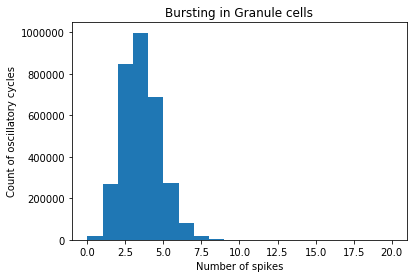

In [7]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = simulation_time-analysis_time, 
                                                          end_time = simulation_time)
oscillation_frequency = 8.0
import numpy
number_of_bins = int(analysis_time*oscillation_frequency)
bin_id = numpy.floor(gtime*oscillation_frequency).astype(int)
n_grc_neurons = simulation.cerebellum.get_number_of_elements(layer='grclayer')
neuron_list = range(n_grc_neurons)
#neuron_list = [499]
bin_count = numpy.zeros([len(neuron_list),number_of_bins],dtype=int)
for idx, neuron_id in enumerate(neuron_list):
    neuron_spike_index = (gcell_id==neuron_id)
    bin_count[idx,:] = numpy.bincount(bin_id[neuron_spike_index],minlength=number_of_bins)
%matplotlib inline
import matplotlib.pyplot as plt
histogr = numpy.bincount(bin_count.ravel(),minlength=20)
rel_hist = histogr.astype(float)/(len(neuron_list)*number_of_bins)
print rel_hist
plt.hist(bin_count.ravel(), bins=20,range=(0,20))
plt.title('Bursting in Granule cells')
plt.ylabel('Count of oscillatory cycles')
plt.xlabel('Number of spikes')

### Perceptron Learning

Define some supplementary functions

In [8]:
def create_binary_cell_firing_matrix(layer, init_time, window_length, time_bin):
    # Cell index is the list with all the neuron ids in the population 
    n_neurons = simulation.cerebellum.get_number_of_elements(layer=layer)
    cell_index = range(n_neurons)
    
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    bin_time_init = numpy.linspace(init_time, init_time+window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(init_time+time_bin,init_time+window_length,num=window_length*inv_time_bin)
    num_bins = len(bin_time_init)
        
    # Final matrix indicating which bins are registered spikes
    bin_has_fired = numpy.empty((n_neurons, num_bins), dtype='bool')
    bin_has_fired[:,:] = False
        
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = init_time+window_length)
    # Calculate the bin index for each spike
    spike_time_index = numpy.logical_and(gtime>=init_time, gtime<=init_time+window_length)
    
    spike_bin_index = numpy.floor((gtime[spike_time_index]-init_time)*inv_time_bin).astype(int)

    # Calculate the cell index (not needed if cells are numbered from 0 to number_of_cells)
    spike_cell_index = gcell_id[spike_time_index]

    # Final matrix indicating which bins have spikes registered spikes
    if len(spike_bin_index) and len(spike_cell_index):
        bin_has_fired[spike_cell_index,spike_bin_index] = True
        
    return bin_has_fired

def create_integer_cell_firing_matrix(layer, init_time, window_length, time_bin):
    # Cell index is the list with all the neuron ids in the population 
    n_neurons = simulation.cerebellum.get_number_of_elements(layer=layer)
    cell_index = range(n_neurons)
    
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    bin_time_init = numpy.linspace(init_time, init_time+window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(init_time+time_bin,init_time+window_length,num=window_length*inv_time_bin)
    num_bins = len(bin_time_init)
        
    # Final matrix indicating which bins are registered spikes
    bin_spikes = numpy.zeros((n_neurons, num_bins), dtype=int)
        
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = init_time+window_length)
    # Calculate the bin index for each spike
    spike_time_index = numpy.logical_and(gtime>=init_time, gtime<=init_time+window_length)
    
    spike_bin_index = numpy.floor((gtime[spike_time_index]-init_time)*inv_time_bin).astype(int)

    # Calculate the cell index (not needed if cells are numbered from 0 to number_of_cells)
    spike_cell_index = gcell_id[spike_time_index]

    # Final matrix indicating which bins have registered spikes        
    for neuron_id in cell_index:
        neuron_spike_index = (spike_cell_index==neuron_id)
        bin_spikes[neuron_id,:] = numpy.bincount(spike_bin_index[neuron_spike_index],minlength=num_bins)
        
    return bin_spikes

def create_active_pattern_matrix(init_time, window_length, time_bin):
    pattern_generator = simulation.pattern_generator
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    bin_time_init = numpy.linspace(init_time, init_time+window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(init_time+time_bin,init_time+window_length,num=window_length*inv_time_bin)
    num_bins = len(bin_time_init)
    
    # Initialize a matrix
    pattern_index = range(pattern_generator.number_of_patterns)
    
    # Calculate the time of each pattern interval
    # time_end_of_pattern is the accumulated of pattern bin lengths
    pattern_indexes = numpy.logical_and(pattern_generator.pattern_length_cum>=init_time, pattern_generator.pattern_length_cum<=init_time+window_length)
    time_end_of_pattern = pattern_generator.pattern_length_cum[pattern_indexes]
    time_init_of_pattern = numpy.append([init_time],time_end_of_pattern[:-1])

    # Create sparse representation of pattern presentation
    pattern_activation = numpy.empty((pattern_generator.pattern_length_cum.shape[0], pattern_generator.number_of_patterns), dtype='bool')
    pattern_activation[:] = False
    for index, pat_activation in enumerate(pattern_generator.pattern_id_index):
        pattern_activation[pat_activation,index] = True
    pattern_activation_in_window = pattern_activation[pattern_indexes,:]

    # Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
    bin_end_of_pattern = numpy.floor((time_end_of_pattern-init_time) * inv_time_bin).astype(int)
    if (bin_end_of_pattern[-1]>=num_bins):
        bin_end_of_pattern[-1]=num_bins-1
    bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
    if (bin_init_of_pattern[-1]>=num_bins):
        bin_init_of_pattern[-1]=num_bins-1

    # Final matrix indicating which bins are considered of each pattern
    bin_is_pattern = numpy.empty((pattern_generator.number_of_patterns, num_bins),dtype='bool')
    bin_is_pattern[:,:] = False
    bin_pattern = numpy.zeros(num_bins)

    # How-to calculate pattern_generator.pattern_id_index
    # Select the pattern bins where each pattern is presented
    # pattern_activation is the dataset with the same name in the stimulation file

    pattern_id_index = numpy.array([numpy.where(pattern_activation_in_window[:,num_pattern])[0] for num_pattern in range(pattern_generator.number_of_patterns)])

    # Calculate if each time-bin receives stimulation (at least half of the time) from each pattern
    for key, value in enumerate(pattern_index):
        time_of_pattern_in_bin = numpy.zeros(num_bins)
        for index in pattern_id_index[value]:
            init_bin = bin_init_of_pattern[index]
            end_bin = bin_end_of_pattern[index]

            list_of_bins = range(init_bin,end_bin+1)

            # Add the time of the initial bin (if exists)
            if init_bin!=end_bin:
                time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

            # Add the time of the intermediate bins (if exist)
            time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

            # Add the time of the final bin
            time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

        # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
        bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
        bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    # Calculate mutual information in the time window
    init_bin = 0
    end_bin = int(window_length * inv_time_bin)
    
    return bin_is_pattern

def create_input_activation_matrix(init_time, window_length, time_bin):
    
    pattern_generator = simulation.pattern_generator
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    bin_time_init = numpy.linspace(init_time, init_time+window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(init_time+time_bin,init_time+window_length,num=window_length*inv_time_bin)
    num_bins = len(bin_time_init)
    
    # Calculate the time of each pattern interval
    # time_end_of_pattern is the accumulated of pattern bin lengths
    pattern_indexes = numpy.logical_and(pattern_generator.pattern_length_cum>=init_time, pattern_generator.pattern_length_cum<=init_time+window_length)
    time_end_of_pattern = pattern_generator.pattern_length_cum[pattern_indexes]
    time_init_of_pattern = numpy.append([init_time],time_end_of_pattern[:-1])

    # Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
    bin_end_of_pattern = numpy.floor((time_end_of_pattern-init_time) * inv_time_bin).astype(int)
    if (bin_end_of_pattern[-1]>=num_bins):
        bin_end_of_pattern[-1]=num_bins-1
    bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
    if (bin_init_of_pattern[-1]>=num_bins):
        bin_init_of_pattern[-1]=num_bins-1

    # Calculate the number of mossy fibers from the activation levels matrix
    fiber_number = pattern_generator.activation_levels.shape[1]
    
    # Final matrix indicating which bins are considered of each pattern
    input_activation = numpy.empty((fiber_number, num_bins),dtype='float')
    input_activation[:,:] = 0.0

    # Calculate if each time-bin receives stimulation (at least half of the time) from each pattern
    for index in range(bin_init_of_pattern.shape[0]):
        
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]

        list_of_bins = range(init_bin,end_bin+1)

        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            input_activation[:,init_bin] += pattern_generator.activation_levels[index,:]*(bin_time_end[init_bin] - time_init_of_pattern[index])

        # Add the time of the intermediate bins (if exist)
        for num_bin in list_of_bins[1:-1]:
            input_activation[:,num_bin] += pattern_generator.activation_levels[index,:]*(time_bin)

        # Add the time of the final bin
        input_activation[:,end_bin] += pattern_generator.activation_levels[index,:]*(time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    input_activation = input_activation/time_bin
    
    return input_activation

Extract the information representation in mossy fibers and granule cells

In [9]:
# Create dataset with the ending analysis_time seconds
binary_grc_activity_matrix = create_binary_cell_firing_matrix('grclayer', simulation_time-analysis_time, analysis_time, 0.125).T
print binary_grc_activity_matrix.shape
integer_grc_activity_matrix = create_integer_cell_firing_matrix('grclayer', simulation_time-analysis_time, analysis_time, 0.125).T
print integer_grc_activity_matrix.shape
integer_mf_activity_matrix = create_integer_cell_firing_matrix('mflayer', simulation_time-analysis_time, analysis_time, 0.125).T
print integer_mf_activity_matrix.shape
stimulation_matrix = create_input_activation_matrix( simulation_time-analysis_time, analysis_time, 0.125).T
print stimulation_matrix.shape
pattern_activation_matrix = create_active_pattern_matrix( simulation_time-analysis_time, analysis_time, 0.125).T
print pattern_activation_matrix.shape
# Standarize the input data
std_binary_grc_activity_matrix = binary_grc_activity_matrix - numpy.mean(binary_grc_activity_matrix, axis=0)
aux_std = numpy.std(std_binary_grc_activity_matrix, axis=0)
if (numpy.any(aux_std==0.0)):
    print 'Cannot normalize GrC binary activity matrix. STD=0',numpy.where(aux_std==0.0)
else:
    std_binary_grc_activity_matrix = std_binary_grc_activity_matrix / numpy.std(std_binary_grc_activity_matrix, axis=0)

std_integer_grc_activity_matrix = integer_grc_activity_matrix - numpy.mean(integer_grc_activity_matrix, axis=0)
aux_std = numpy.std(std_integer_grc_activity_matrix, axis=0)
if (numpy.any(aux_std==0.0)):
    print 'Cannot normalize GrC integer activity matrix. STD=0',numpy.where(aux_std==0.0)
else:
    std_integer_grc_activity_matrix = std_integer_grc_activity_matrix / numpy.std(std_integer_grc_activity_matrix, axis=0)


std_integer_mf_activity_matrix = integer_mf_activity_matrix - numpy.mean(integer_mf_activity_matrix, axis=0)
aux_std = numpy.std(std_integer_mf_activity_matrix, axis=0)
if (numpy.any(aux_std==0.0)):
    print 'Cannot normalize MF integer activity matrix. STD=0',numpy.where(aux_std==0.0)
else:
    std_integer_mf_activity_matrix = std_integer_mf_activity_matrix / numpy.std(std_integer_mf_activity_matrix, axis=0)

std_stimulation_matrix = stimulation_matrix - numpy.mean(stimulation_matrix, axis=0)
std_stimulation_matrix = std_stimulation_matrix / numpy.std(std_stimulation_matrix, axis=0)
# Create training and test datasets
training_epochs = 100
val_ratio = 0.8
val_n_elements = int(numpy.floor(binary_grc_activity_matrix.shape[0]*val_ratio))
test_n_elements = binary_grc_activity_matrix.shape[0] - val_n_elements
choice_order = numpy.random.choice(binary_grc_activity_matrix.shape[0],binary_grc_activity_matrix.shape[0])
validation = choice_order[:val_n_elements]
test = choice_order[-test_n_elements:]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


(800, 4000)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


(800, 4000)
(800, 300)
(800, 300)
(800, 4)
Cannot normalize GrC binary activity matrix. STD=0 (array([   0,    1,    2, ..., 3996, 3997, 3998]),)
Cannot normalize GrC integer activity matrix. STD=0 (array([ 429,  499,  551,  559, 1251, 1889, 1969, 2058, 2137, 2150, 2434,
       2472, 2482, 2620, 2711, 2839, 2848, 2903, 2952, 2998, 3335, 3657,
       3702, 3919]),)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:146: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:147: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


Teach a single-layer perceptron with the stimulation matrix

In [10]:
import keras.models
import keras.layers
# load and prepare the dataset
st_model = keras.models.Sequential()
st_layer = keras.layers.Dense(simulation.pattern_generator.number_of_patterns, input_dim=stimulation_matrix.shape[1], activation='sigmoid')
st_model.add(st_layer)
st_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
st_history = st_model.fit(std_stimulation_matrix[validation,:], pattern_activation_matrix[validation,:], nb_epoch=training_epochs, batch_size=stimulation_matrix.shape[0]/10)

Using TensorFlow backend.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
640/640 [==============================] - 0s - loss: 0.8112 - acc: 0.5562     
Epoch 2/100
640/640 [==============================] - 0s - loss: 0.7674 - acc: 0.5820     
Epoch 3/100
640/640 [==============================] - 0s - loss: 0.7276 - acc: 0.6121     
Epoch 4/100
640/640 [==============================] - 0s - loss: 0.6916 - acc: 0.6383     
Epoch 5/100
640/640 [==============================] - 0s - loss: 0.6587 - acc: 0.6633     
Epoch 6/100
640/640 [==============================] - 0s - loss: 0.6287 - acc: 0.6785     
Epoch 7/100
640/640 [==============================] - 0s - loss: 0.6011 - acc: 0.6992     
Epoch 8/100
640/640 [==============================] - 0s - loss: 0.5761 - acc: 0.7215     
Epoch 9/100
640/640 [==============================] - 0s - loss: 0.5530 - acc: 0.7313     
Epoch 10/100
640/640 [==============================] - 0s - loss: 0.5318 - acc: 0.7418     
Epoch 11/100
640/640 [==============================] - 0s - loss: 0.5121 - acc

640/640 [==============================] - 0s - loss: 0.1568 - acc: 0.9656     
Epoch 89/100
640/640 [==============================] - 0s - loss: 0.1556 - acc: 0.9664     
Epoch 90/100
640/640 [==============================] - 0s - loss: 0.1545 - acc: 0.9664     
Epoch 91/100
640/640 [==============================] - 0s - loss: 0.1534 - acc: 0.9664     
Epoch 92/100
640/640 [==============================] - 0s - loss: 0.1523 - acc: 0.9668     
Epoch 93/100
640/640 [==============================] - 0s - loss: 0.1512 - acc: 0.9668     
Epoch 94/100
640/640 [==============================] - 0s - loss: 0.1501 - acc: 0.9668     
Epoch 95/100
640/640 [==============================] - 0s - loss: 0.1491 - acc: 0.9668     
Epoch 96/100
640/640 [==============================] - 0s - loss: 0.1481 - acc: 0.9668     
Epoch 97/100
640/640 [==============================] - 0s - loss: 0.1471 - acc: 0.9668     
Epoch 98/100
640/640 [==============================] - 0s - loss: 0.1461 - acc: 0.

Teach a single-layer perceptron with the MF layer activity matrix

In [11]:
import keras.models
import keras.layers
# load and prepare the dataset
mf_model = keras.models.Sequential()
mf_layer = keras.layers.Dense(simulation.pattern_generator.number_of_patterns, input_dim=std_integer_mf_activity_matrix.shape[1], activation='sigmoid')
mf_model.add(mf_layer)
mf_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
mf_history = mf_model.fit(std_integer_mf_activity_matrix[validation,:], pattern_activation_matrix[validation,:], nb_epoch=training_epochs, batch_size=std_integer_mf_activity_matrix.shape[0]/10)

Epoch 1/100
640/640 [==============================] - 0s - loss: 0.9030 - acc: 0.5027     
Epoch 2/100
640/640 [==============================] - 0s - loss: 0.8690 - acc: 0.5227     
Epoch 3/100
640/640 [==============================] - 0s - loss: 0.8373 - acc: 0.5348     
Epoch 4/100
640/640 [==============================] - 0s - loss: 0.8077 - acc: 0.5520     
Epoch 5/100
640/640 [==============================] - 0s - loss: 0.7798 - acc: 0.5605     
Epoch 6/100
640/640 [==============================] - 0s - loss: 0.7538 - acc: 0.5766     
Epoch 7/100
640/640 [==============================] - 0s - loss: 0.7294 - acc: 0.5895     
Epoch 8/100
640/640 [==============================] - 0s - loss: 0.7063 - acc: 0.6031     
Epoch 9/100
640/640 [==============================] - 0s - loss: 0.6848 - acc: 0.6145     
Epoch 10/100
640/640 [==============================] - 0s - loss: 0.6645 - acc: 0.6293     
Epoch 11/100
640/640 [==============================] - 0s - loss: 0.6454 - acc

640/640 [==============================] - 0s - loss: 0.2293 - acc: 0.9359     
Epoch 89/100
640/640 [==============================] - 0s - loss: 0.2277 - acc: 0.9363     
Epoch 90/100
640/640 [==============================] - 0s - loss: 0.2261 - acc: 0.9371     
Epoch 91/100
640/640 [==============================] - 0s - loss: 0.2245 - acc: 0.9375     
Epoch 92/100
640/640 [==============================] - 0s - loss: 0.2230 - acc: 0.9375     
Epoch 93/100
640/640 [==============================] - 0s - loss: 0.2215 - acc: 0.9391     
Epoch 94/100
640/640 [==============================] - 0s - loss: 0.2200 - acc: 0.9391     
Epoch 95/100
640/640 [==============================] - 0s - loss: 0.2185 - acc: 0.9391     
Epoch 96/100
640/640 [==============================] - 0s - loss: 0.2171 - acc: 0.9398     
Epoch 97/100
640/640 [==============================] - 0s - loss: 0.2157 - acc: 0.9418     
Epoch 98/100
640/640 [==============================] - 0s - loss: 0.2142 - acc: 0.

Teach a single-layer perceptron with the granular layer binary activity matrix

In [12]:
import keras.models
import keras.layers
# load and prepare the dataset
bin_gc_model = keras.models.Sequential()
bin_gc_layer = keras.layers.Dense(simulation.pattern_generator.number_of_patterns, input_dim=std_binary_grc_activity_matrix.shape[1], activation='sigmoid')
bin_gc_model.add(bin_gc_layer)
bin_gc_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
bin_gc_history = bin_gc_model.fit(std_binary_grc_activity_matrix[validation,:], pattern_activation_matrix[validation,:], nb_epoch=training_epochs, batch_size=std_binary_grc_activity_matrix.shape[0]/10)

Epoch 1/100
640/640 [==============================] - 0s - loss: 0.6926 - acc: 0.6117     
Epoch 2/100
640/640 [==============================] - 0s - loss: 0.6918 - acc: 0.6617     
Epoch 3/100
640/640 [==============================] - 0s - loss: 0.6910 - acc: 0.6711     
Epoch 4/100
640/640 [==============================] - 0s - loss: 0.6902 - acc: 0.6766     
Epoch 5/100
640/640 [==============================] - 0s - loss: 0.6894 - acc: 0.6797     
Epoch 6/100
640/640 [==============================] - 0s - loss: 0.6887 - acc: 0.6773     
Epoch 7/100
640/640 [==============================] - 0s - loss: 0.6879 - acc: 0.6891     
Epoch 8/100
640/640 [==============================] - 0s - loss: 0.6871 - acc: 0.6930     
Epoch 9/100
640/640 [==============================] - 0s - loss: 0.6864 - acc: 0.6910     
Epoch 10/100
640/640 [==============================] - 0s - loss: 0.6856 - acc: 0.6918     
Epoch 11/100
640/640 [==============================] - 0s - loss: 0.6849 - acc

640/640 [==============================] - 0s - loss: 0.6448 - acc: 0.6996     
Epoch 89/100
640/640 [==============================] - 0s - loss: 0.6445 - acc: 0.6996     
Epoch 90/100
640/640 [==============================] - 0s - loss: 0.6441 - acc: 0.6996     
Epoch 91/100
640/640 [==============================] - 0s - loss: 0.6438 - acc: 0.6996     
Epoch 92/100
640/640 [==============================] - 0s - loss: 0.6434 - acc: 0.6996     
Epoch 93/100
640/640 [==============================] - 0s - loss: 0.6431 - acc: 0.6996     
Epoch 94/100
640/640 [==============================] - 0s - loss: 0.6428 - acc: 0.6996     
Epoch 95/100
640/640 [==============================] - 0s - loss: 0.6424 - acc: 0.6996     
Epoch 96/100
640/640 [==============================] - 0s - loss: 0.6421 - acc: 0.6996     
Epoch 97/100
640/640 [==============================] - 0s - loss: 0.6418 - acc: 0.6996     
Epoch 98/100
640/640 [==============================] - 0s - loss: 0.6415 - acc: 0.

Teach a single-layer perceptron with the granular layer integer activity matrix

In [13]:
import keras.models
import keras.layers
# load and prepare the dataset
int_gc_model = keras.models.Sequential()
int_gc_layer = keras.layers.Dense(simulation.pattern_generator.number_of_patterns, input_dim=std_integer_grc_activity_matrix.shape[1], activation='sigmoid')
int_gc_model.add(int_gc_layer)
int_gc_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
int_gc_history = int_gc_model.fit(std_integer_grc_activity_matrix[validation,:], pattern_activation_matrix[validation,:], nb_epoch=training_epochs, batch_size=std_integer_grc_activity_matrix.shape[0]/10)

Epoch 1/100
640/640 [==============================] - 0s - loss: 0.7130 - acc: 0.5883     
Epoch 2/100
640/640 [==============================] - 0s - loss: 0.5443 - acc: 0.7207     
Epoch 3/100
640/640 [==============================] - 0s - loss: 0.4463 - acc: 0.7957     
Epoch 4/100
640/640 [==============================] - 0s - loss: 0.3837 - acc: 0.8461     
Epoch 5/100
640/640 [==============================] - 0s - loss: 0.3393 - acc: 0.8793     
Epoch 6/100
640/640 [==============================] - 0s - loss: 0.3065 - acc: 0.9000     
Epoch 7/100
640/640 [==============================] - 0s - loss: 0.2806 - acc: 0.9148     
Epoch 8/100
640/640 [==============================] - 0s - loss: 0.2596 - acc: 0.9254     
Epoch 9/100
640/640 [==============================] - 0s - loss: 0.2422 - acc: 0.9336     
Epoch 10/100
640/640 [==============================] - 0s - loss: 0.2274 - acc: 0.9414     
Epoch 11/100
640/640 [==============================] - 0s - loss: 0.2148 - acc

640/640 [==============================] - 0s - loss: 0.0455 - acc: 0.9988     
Epoch 90/100
640/640 [==============================] - 0s - loss: 0.0450 - acc: 0.9988     
Epoch 91/100
640/640 [==============================] - 0s - loss: 0.0446 - acc: 0.9988     
Epoch 92/100
640/640 [==============================] - 0s - loss: 0.0441 - acc: 0.9988     
Epoch 93/100
640/640 [==============================] - ETA: 0s - loss: 0.0443 - acc: 1.000 - 0s - loss: 0.0437 - acc: 0.9988     
Epoch 94/100
640/640 [==============================] - 0s - loss: 0.0433 - acc: 0.9988     
Epoch 95/100
640/640 [==============================] - 0s - loss: 0.0429 - acc: 0.9988     
Epoch 96/100
640/640 [==============================] - 0s - loss: 0.0425 - acc: 0.9988     
Epoch 97/100
640/640 [==============================] - 0s - loss: 0.0421 - acc: 0.9992     
Epoch 98/100
640/640 [==============================] - 0s - loss: 0.0417 - acc: 0.9992     
Epoch 99/100
640/640 [=======================

Plot the accuracy evolution during learning

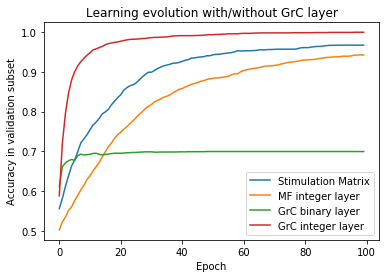

In [14]:
plt.figure()
plt.plot(st_history.history['acc'],label='Stimulation Matrix')
plt.plot(mf_history.history['acc'],label='MF integer layer')
plt.plot(bin_gc_history.history['acc'],label='GrC binary layer')
plt.plot(int_gc_history.history['acc'],label='GrC integer layer')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy in validation subset')
plt.title('Learning evolution with/without GrC layer')
plt.savefig('Learn_MFGrC_%s.eps'%simulation.config_options['mfgrcsynapsis']['initial_weight'])

In [15]:
print 'Test set prediction stimulation layer:'
print st_model.evaluate(std_stimulation_matrix[test,:], pattern_activation_matrix[test,:], batch_size=test_n_elements)
print 'Test set prediction mf integer layer:'
print mf_model.evaluate(std_integer_mf_activity_matrix[test,:], pattern_activation_matrix[test,:], batch_size=test_n_elements)
print 'Test set prediction grc binary layer:'
print bin_gc_model.evaluate(std_binary_grc_activity_matrix[test,:], pattern_activation_matrix[test,:], batch_size=test_n_elements)
print 'Test set prediction grc integer layer:'
print int_gc_model.evaluate(std_integer_grc_activity_matrix[test,:], pattern_activation_matrix[test,:], batch_size=test_n_elements)

Test set prediction stimulation layer:
160/160 [==============================] - 0s
[0.20495553314685822, 0.9296875]
Test set prediction mf integer layer:
160/160 [==============================] - 0s
[0.25209277868270874, 0.91562497615814209]
Test set prediction grc binary layer:
160/160 [==============================] - 0s
[0.63622725009918213, 0.71718752384185791]
Test set prediction grc integer layer:
160/160 [==============================] - 0s
[0.10517124831676483, 0.97031247615814209]
